Import necessary modules

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

import os
import sys 


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier



Determine the current working directory of the Jupyter Notebook and its parent directory, add the parent directory to the Python path, and import specific utility functions from a module

In [2]:
# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath('EDA.ipynb'))

# Determine the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add the parent directory to the Python path
sys.path.append(parent_dir)
from src.utils import *


### 1. EDA

In [3]:
#loading and read the data 
training_data_file = '../data/raw/train.csv'
test_data_file = '../data/raw/test.csv'
df = pd.read_csv(training_data_file)
test = pd.read_csv(test_data_file)
df.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
df.shape

(76518, 38)

In [5]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [6]:
df.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000


Create a training and validation set 

In [8]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=112, stratify=df['Target'])

Data cleaning

In [10]:
train_df = clean_data(train_df)
val_df = clean_data(val_df)

In [11]:
cat_cols, num_cols = column_division(threshold=8, df=train_df)

# Display the results
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Categorical columns: ['Marital status', 'Application order', 'Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']
Numerical columns: ['id', 'Application mode', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nationality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemploymen

Take a look at target distribution

c:\my-drive\ML-projects\kaggle_academics\src\utils.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Target', data=df, palette='viridis')


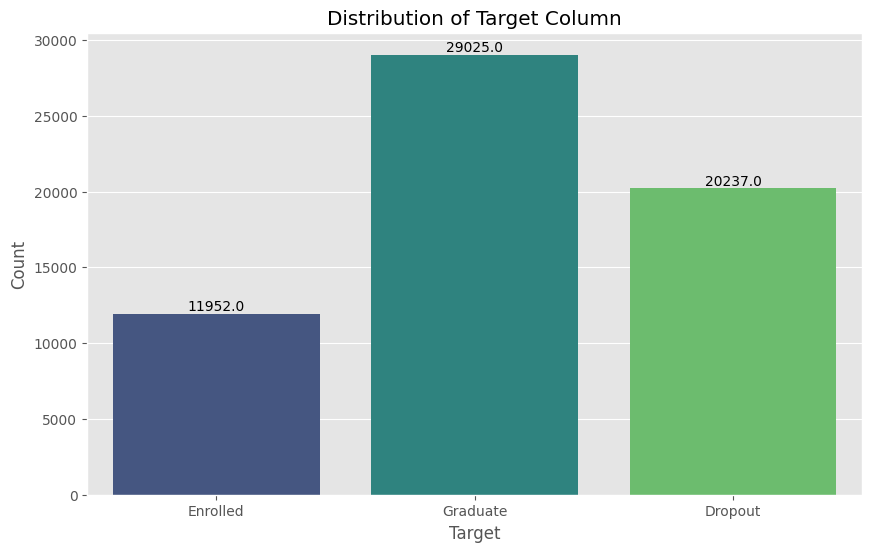

In [12]:
plot_target_distribution(df=train_df)


Plot the categorical columns distribution 

c:\my-drive\ML-projects\kaggle_academics\src\utils.py:255: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette='pastel')
c:\my-drive\ML-projects\kaggle_academics\src\utils.py:255: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette='pastel')
c:\my-drive\ML-projects\kaggle_academics\src\utils.py:255: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette='pastel')
c:\my-drive\ML-projects\kaggle_academics\src\utils.py:255: FutureWarning: 

Passing `palette` without assigning 

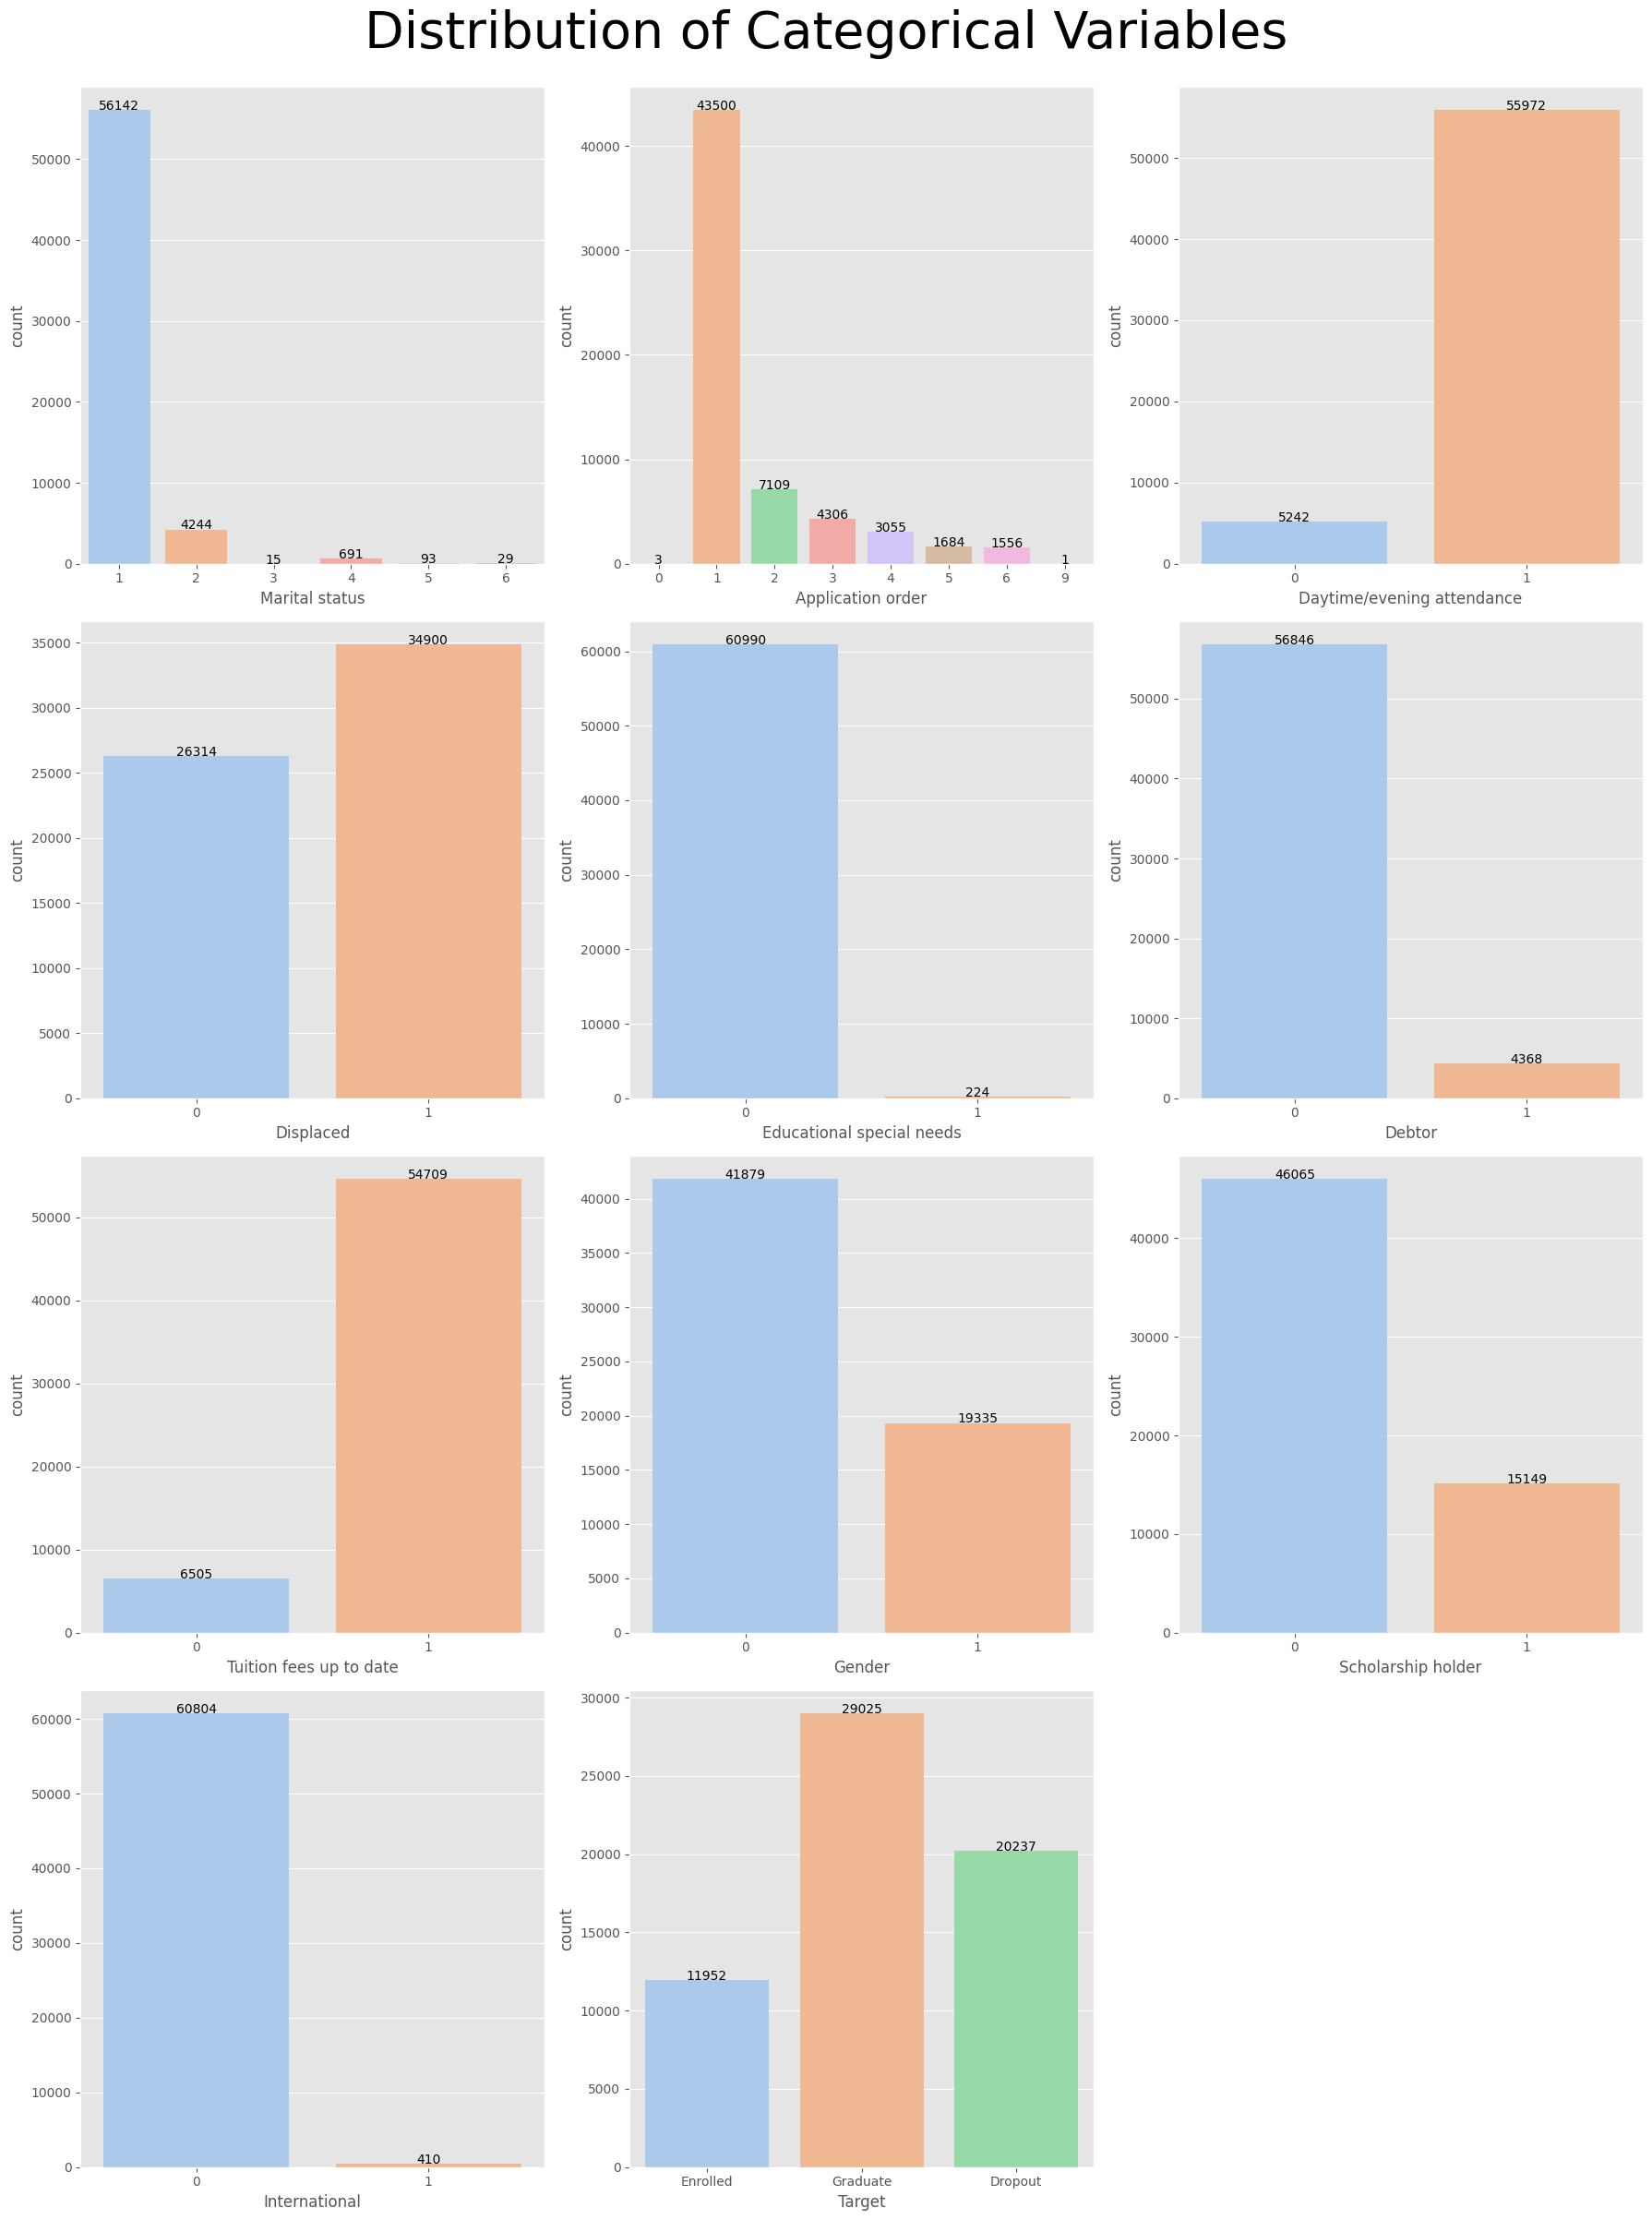

In [13]:
plot_categorical_distribution(df=train_df, cat_cols=cat_cols)

plot the distribution of categorical columns by Target 

c:\my-drive\ML-projects\kaggle_academics\src\utils.py:294: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_col)


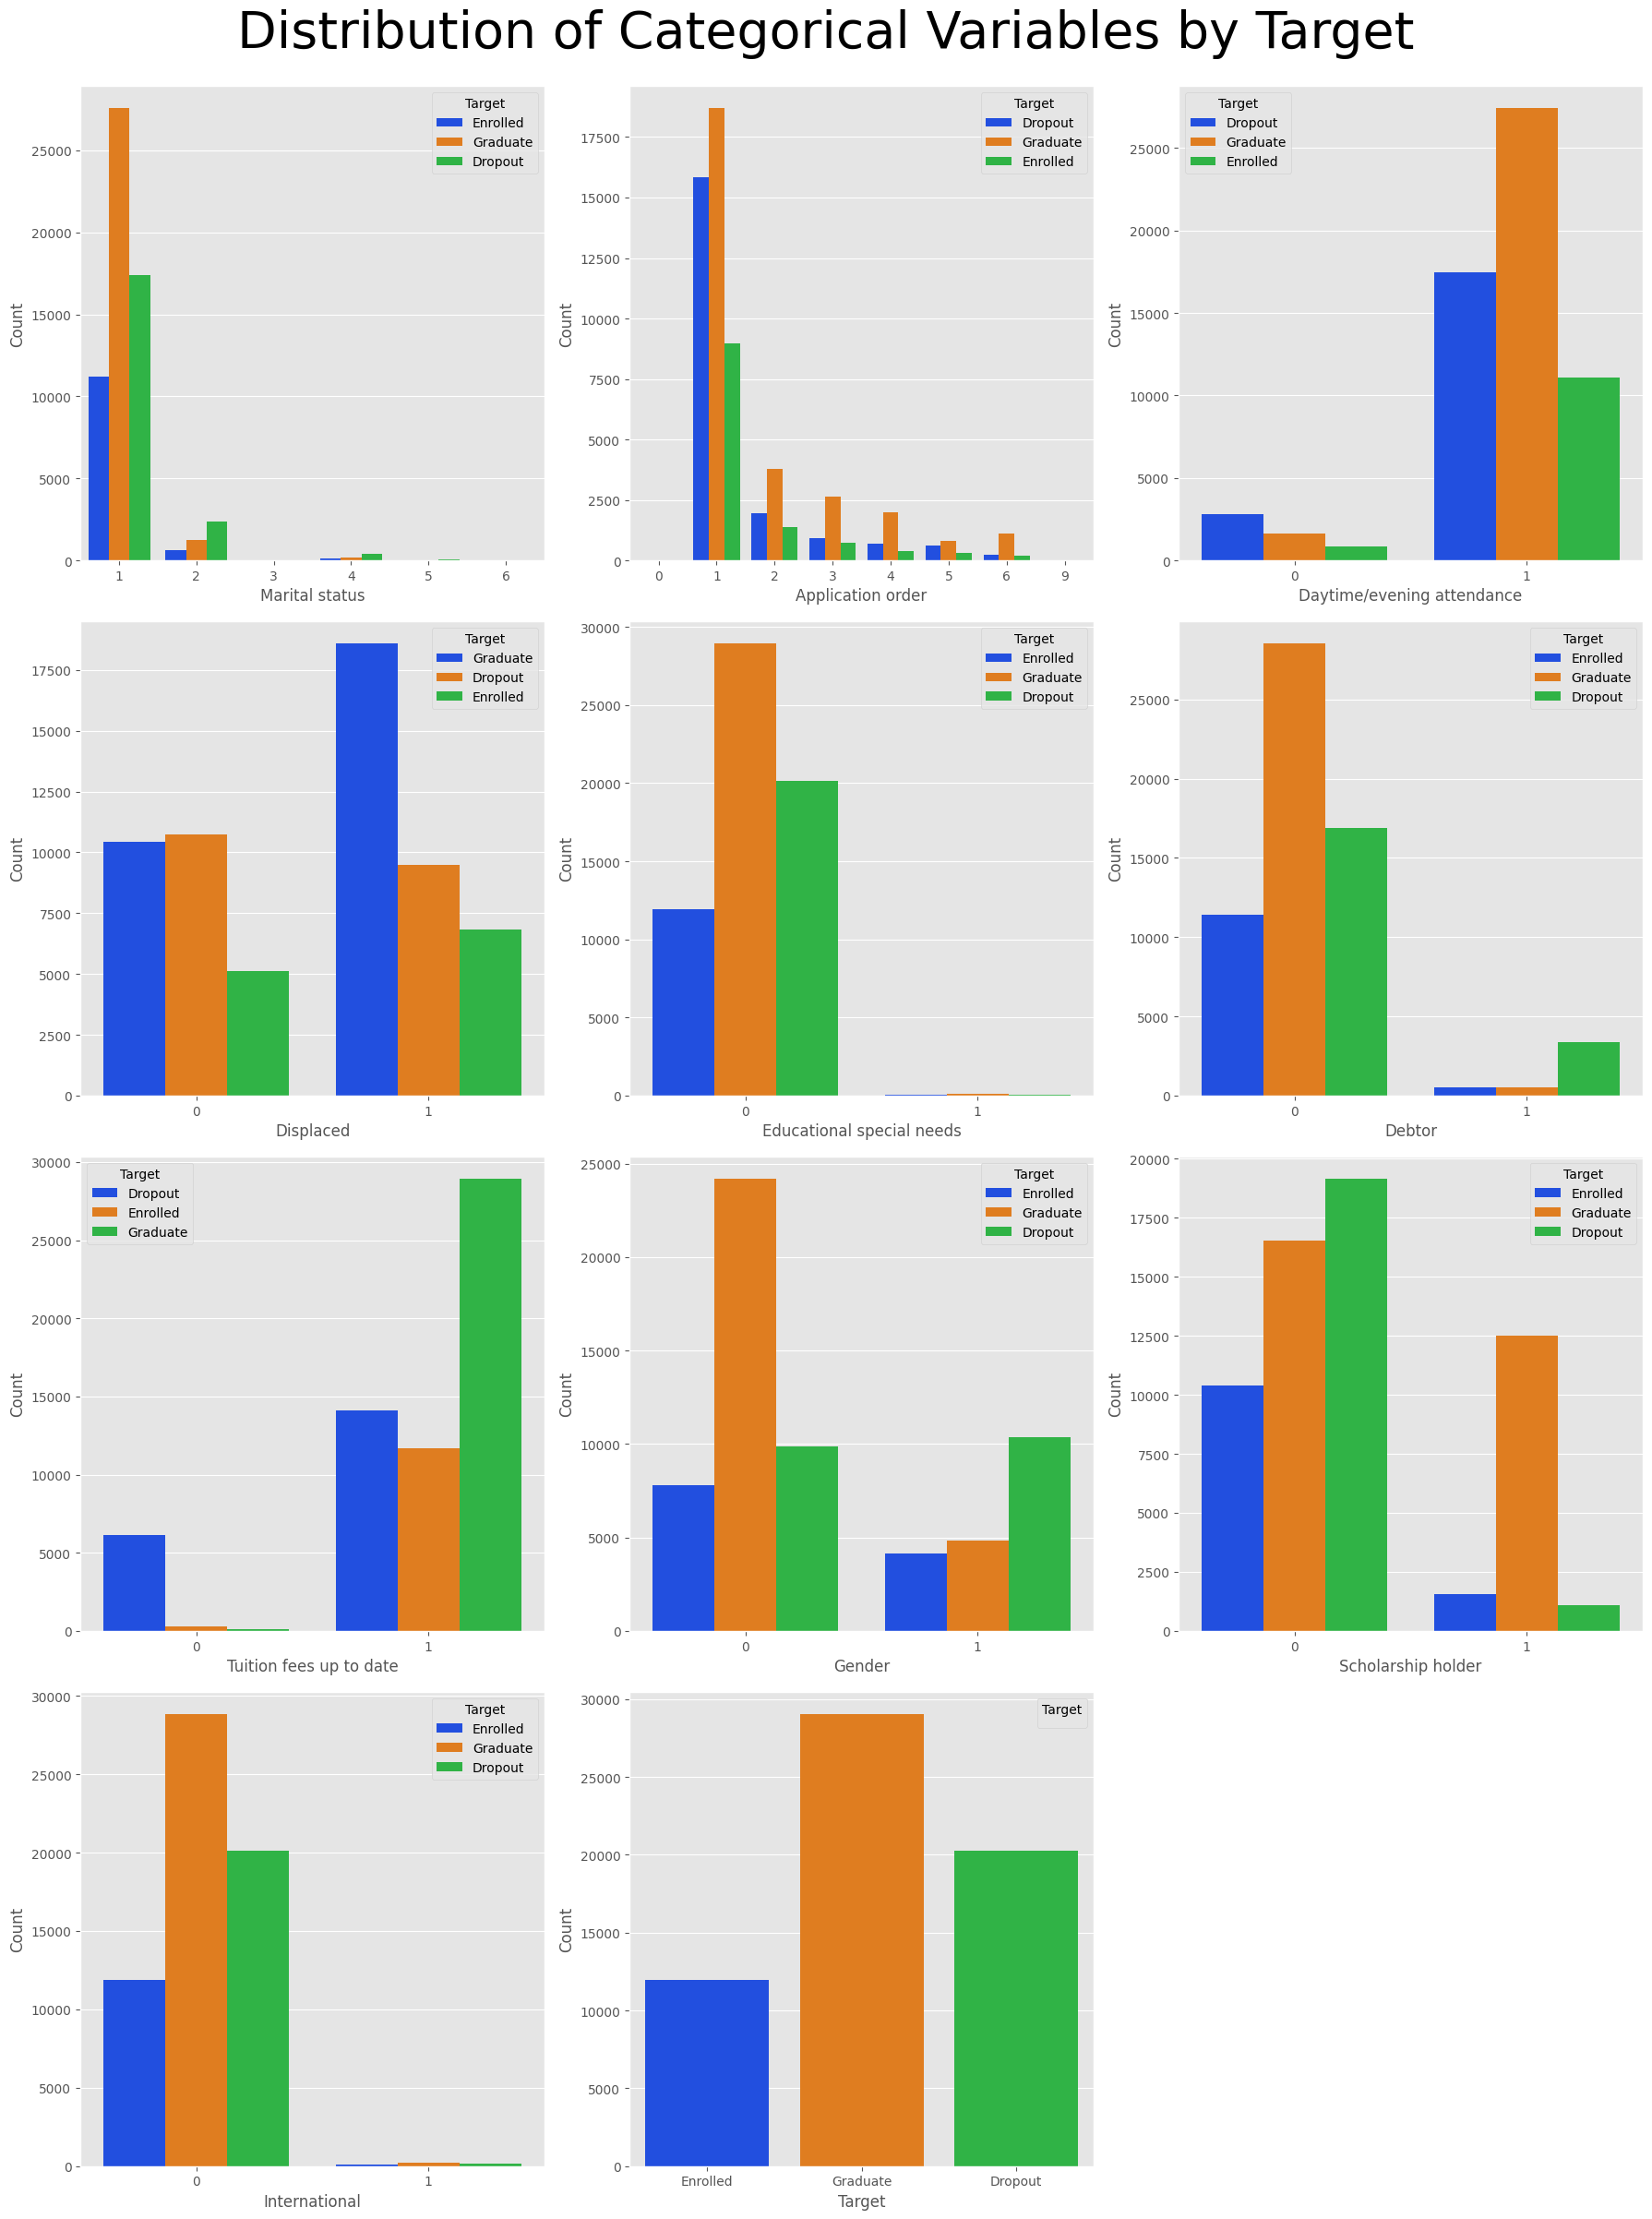

In [14]:
plot_categorical_distribution_by_target(df=train_df, cat_cols=cat_cols,target_col='Target')

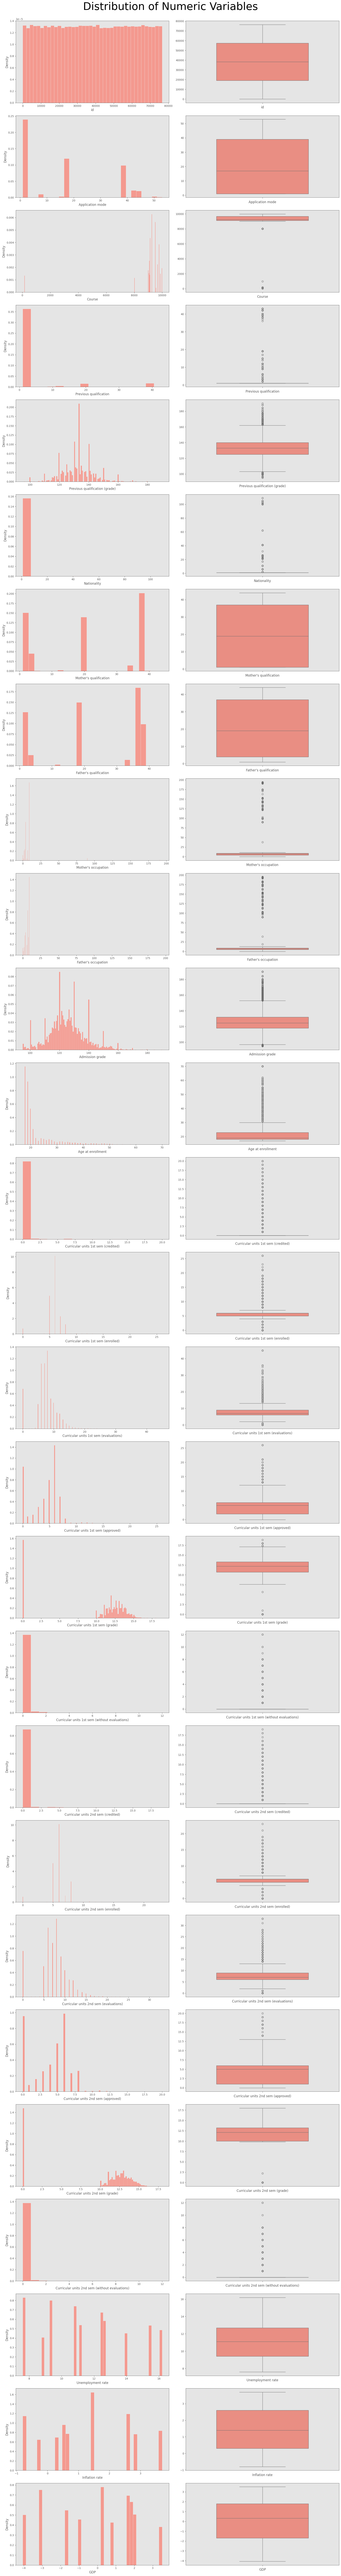

In [15]:
plot_numeric_distribution(df=train_df,num_cols=num_cols)

### correlation matrix


* before we can plot correlation matrix with all columns, we are going to lable target column


In [16]:
train_df = preprocessing(df=train_df)

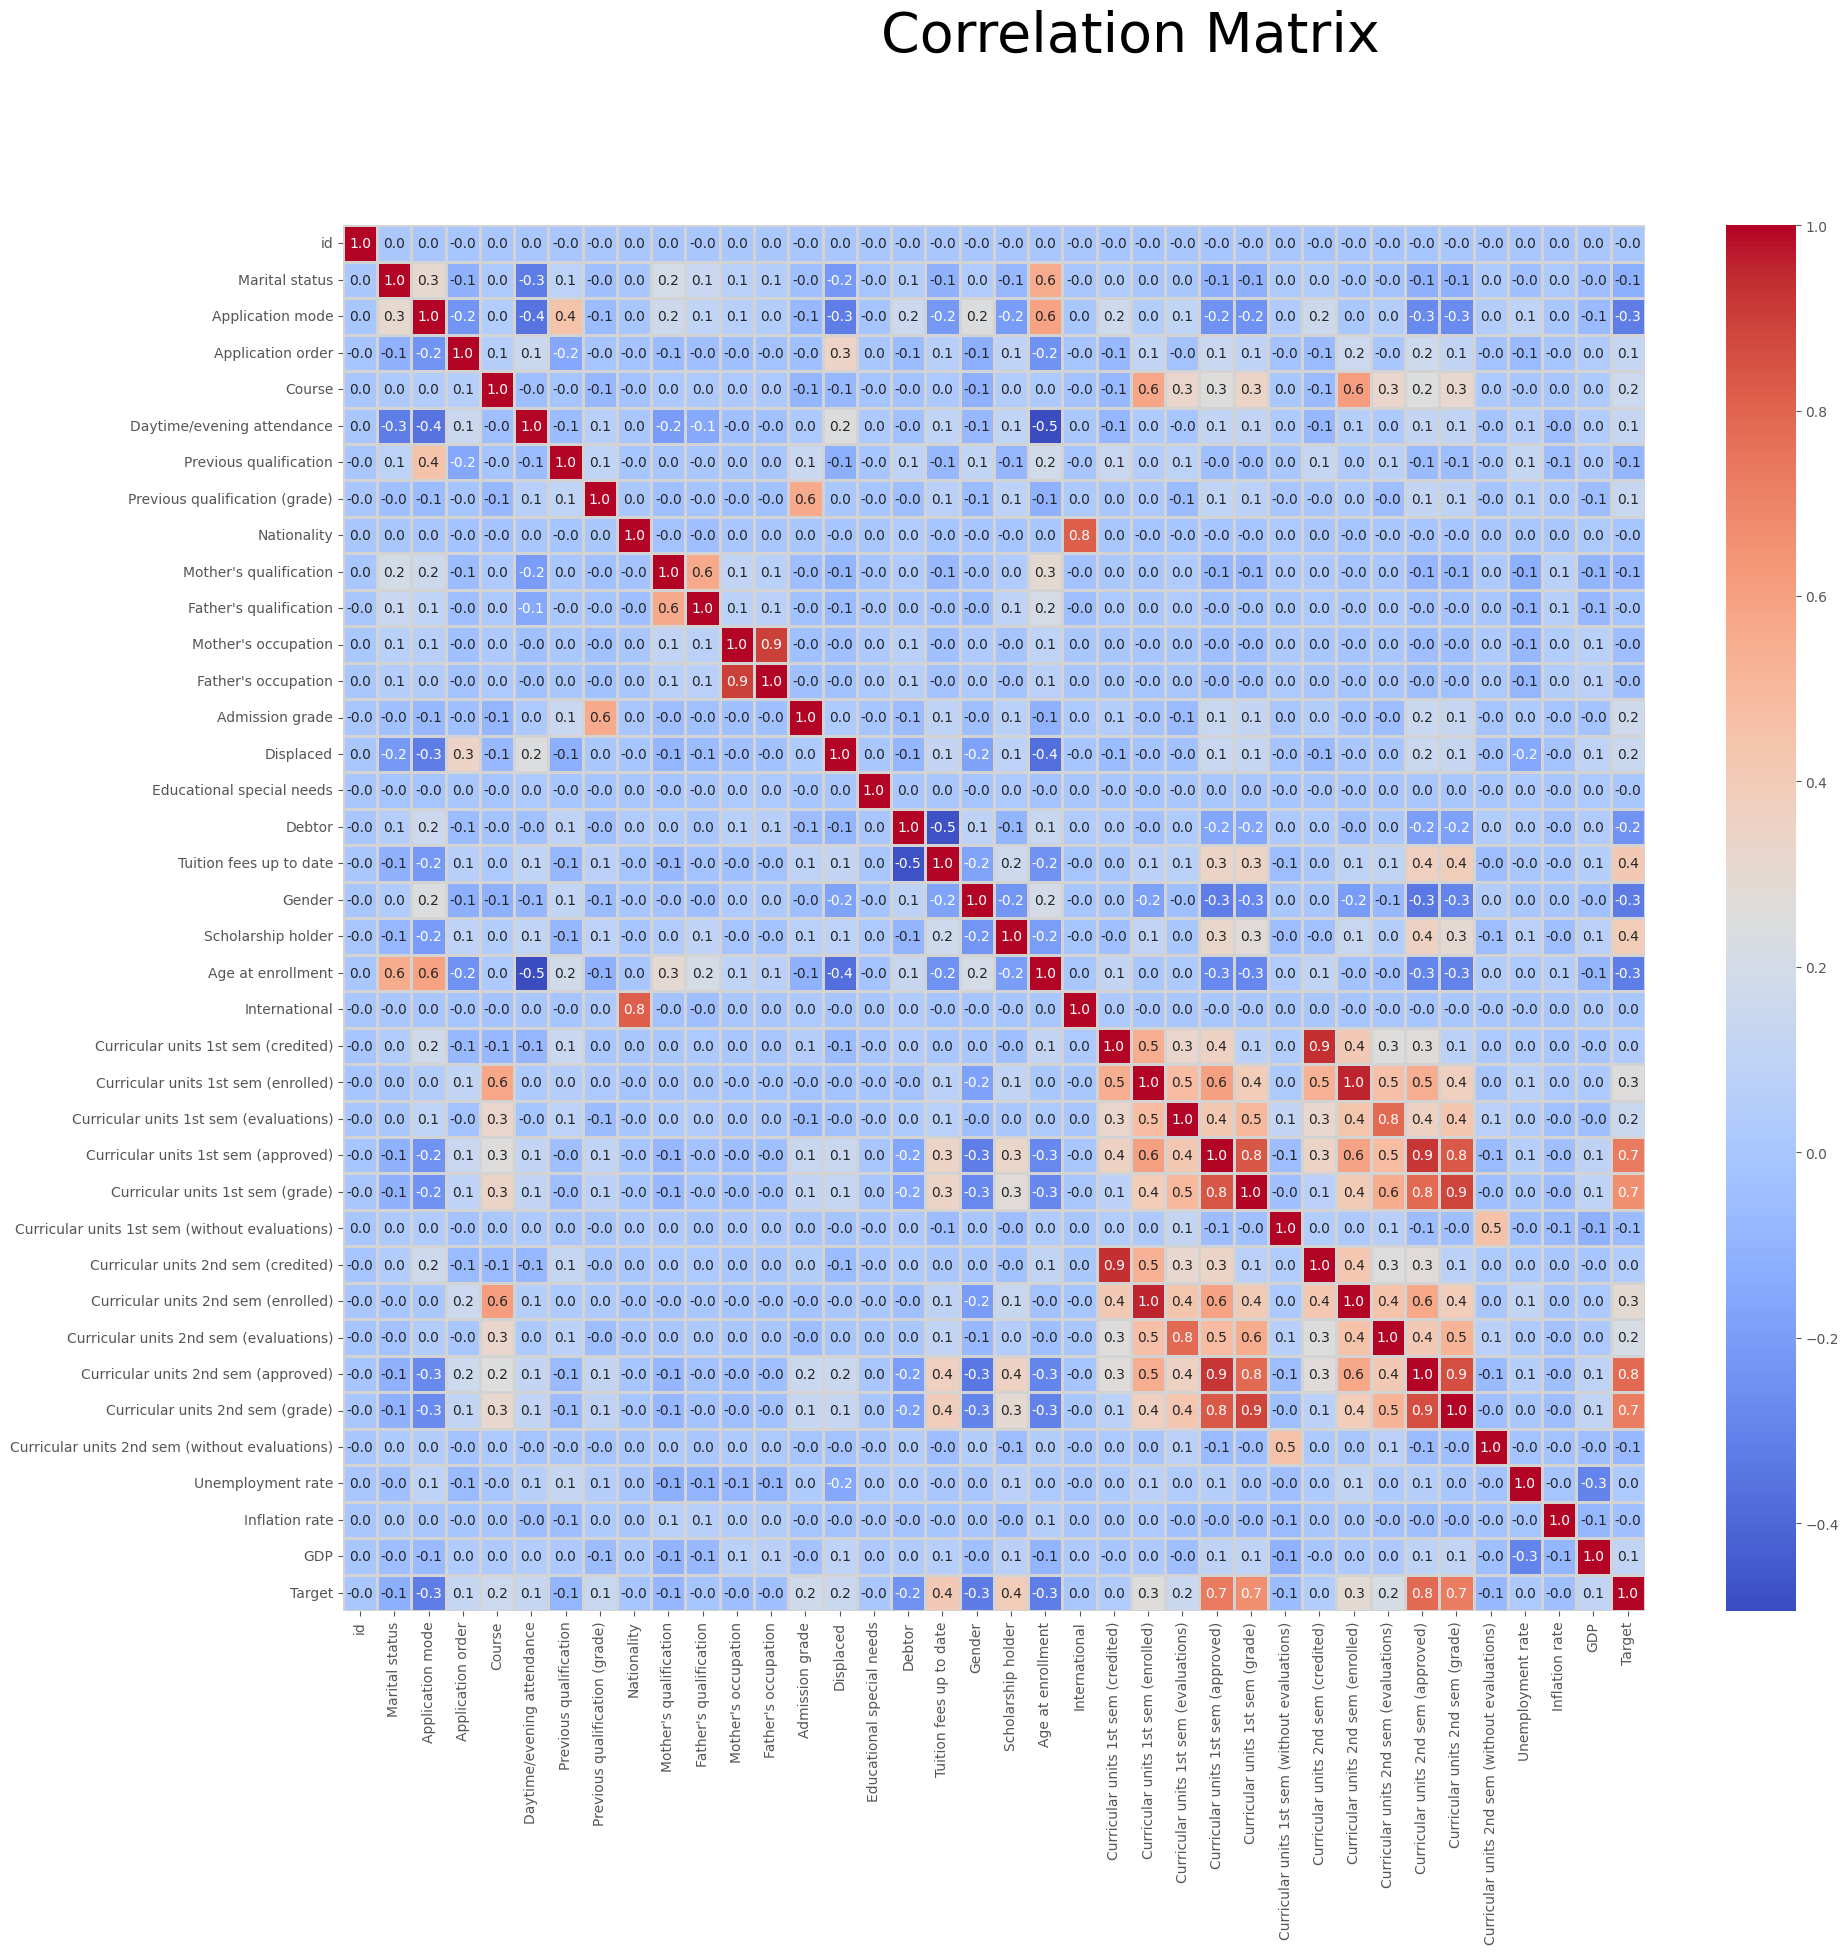

In [17]:
plot_correlation_matrix(df=train_df)

### 3. features selection/engineering (to be added)


### 4. Model training 

In [18]:
initial_features = ['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']

# Split the features and target variable
X_train = train_df[initial_features]
y_train = train_df['Target']
X_test = val_df[initial_features]
y_test = val_df['Target']


In [33]:
models= {
        "Logistic": LogisticRegression,
        "Random Forest": RandomForestClassifier,
        "AdaBoost": AdaBoostClassifier,
        "GradientBoosting": GradientBoostingClassifier,
        "XGBoost": xgb.XGBClassifier,
        "LightGBM": LGBMClassifier,
        "CatBoost": CatBoostClassifier
            }
h_params={
        "Random Forest":{
                'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300]
                },
                
        "XGBoost":{
                #'learning_rate':[.1,.01,.05,.001],
                'n_estimators': [8,16,32,64,128,256]
                },
        "GradientBoosting":{
                'learning_rate': 0.1,
                'n_estimators': 100,
                'max_depth': 3,
                'min_samples_split': 2,
                'min_samples_leaf': 1,
                'subsample': 1,
                'random_state': 42,
                'ccp_alpha': 0.0001
                },
        "Logistic":{
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'max_iter': [100, 200, 300, 400, 500],
                'l1_ratio': [0, 0.1, 0.5, 0.7, 1],  # Only used if penalty='elasticnet'
                'class_weight': [None, 'balanced']
                }
            }

In [34]:
trained_models = {}
acc =[]

for model_name, model in models.items():
    print(f"Training {model_name}...")
    clf, mean_accuracy_score = cross_validate_model(model, X_train, y_train)
    print(f'{model_name} Results: {mean_accuracy_score}\n')
    trained_models[model_name]=clf
    acc.append(mean_accuracy_score)
    
    
    

Training Logistic...


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 0, Train Accuracy: 0.74750, Val Accuracy: 0.74377
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 1, Train Accuracy: 0.73378, Val Accuracy: 0.72793
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 2, Train Accuracy: 0.73431, Val Accuracy: 0.74132
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 3, Train Accuracy: 0.73290, Val Accuracy: 0.73054
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 4, Train Accuracy: 0.73948, Val Accuracy: 0.74563
--------------------------------------------------
Average Validation Accuracy: 0.7378378768242924
Logistic Results: 0.7378378768242924

Training Random Forest...
Fold: 0, Train Accuracy: 0.99998, Val Accuracy: 0.82553
--------------------------------------------------
Fold: 1, Train Accuracy: 0.99998, Val Accuracy: 0.82807
--------------------------------------------------
Fold: 2, Train Accuracy: 0.99996, Val Accuracy: 0.82725
--------------------------------------------------
Fold: 3, Train Accuracy: 0.99998, Val Accuracy: 0.82423
--------------------------------------------------
Fold: 4, Train Accuracy: 1.00000, Val Accuracy: 0.83034
--------------------------------------------------
Average Validation Accuracy: 0.8270820932480607
Random Forest Results: 0.8270820932480607

Training AdaBoost...


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Fold: 0, Train Accuracy: 0.82104, Val Accuracy: 0.81671
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Fold: 1, Train Accuracy: 0.82051, Val Accuracy: 0.81663
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Fold: 2, Train Accuracy: 0.81828, Val Accuracy: 0.82447
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Fold: 3, Train Accuracy: 0.82030, Val Accuracy: 0.81818
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Fold: 4, Train Accuracy: 0.81967, Val Accuracy: 0.82413
--------------------------------------------------
Average Validation Accuracy: 0.8200248979832413
AdaBoost Results: 0.8200248979832413

Training GradientBoosting...
Fold: 0, Train Accuracy: 0.83235, Val Accuracy: 0.82521
--------------------------------------------------
Fold: 1, Train Accuracy: 0.83257, Val Accuracy: 0.82537
--------------------------------------------------
Fold: 2, Train Accuracy: 0.83112, Val Accuracy: 0.83190
--------------------------------------------------
Fold: 3, Train Accuracy: 0.83198, Val Accuracy: 0.82529
--------------------------------------------------
Fold: 4, Train Accuracy: 0.83107, Val Accuracy: 0.83099
--------------------------------------------------
Average Validation Accuracy: 0.8277518744044439
GradientBoosting Results: 0.8277518744044439

Training XGBoost...
Fold: 0, Train Accuracy: 0.89155, Val Accuracy: 0.82790
--------------------------------------------------
Fold: 1, Train Accurac

model scores

In [35]:

accuracy = pd.DataFrame({
    'Model': trained_models.keys(),
    'Score': acc
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted


,Model,Score
5,LightGBM,0.831444
6,CatBoost,0.831231
4,XGBoost,0.829745
3,GradientBoosting,0.827752
1,Random Forest,0.827082
2,AdaBoost,0.820025
0,Logistic,0.737838


### feature importance 

In [22]:
# Feature importance in GBM
chosen_model_name = 'XGBoost'
chosen_model = trained_models[chosen_model_name]

fig = plot_feature_importances(chosen_model, model_name, 'HSV', X_train)
fig


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Importance=%{marker.color}<br>Feature=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([0.        , 0.00433687, 0.00575786, 0.00622592, 0.00648009, 0.00650231,
                                         0.00655969, 0.00684944, 0.00694109, 0.0071116 , 0.0071506 , 0.00743784,
                                         0.00757187, 0.0077042 , 0.00771738, 0.00785959, 0.00808512, 0.00893398,
                                         0.00917246, 0.0093311 , 0.009519  , 0.00963017, 0.00966422, 0.00988299,
                                         0.01161557, 0.01232332, 0.01603549, 0.01802553, 0.01862244, 0.01947589,
                                         0.02734283, 0.03144166, 0.03380417, 0.04372099, 0.11076764, 0.48039907],
                                        dtype=float32),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0.        , 0.00433687, 0.00575786, 0.00622592, 0.00648009, 0.00650231,
                          0.00655969, 0.00684944, 0.00694109, 0.0071116 , 0.0071506 , 0.00743784,
                          0.00757187, 0.0077042 , 0.00771738, 0.00785959, 0.00808512, 0.00893398,
                          0.00917246, 0.0093311 , 0.009519  , 0.00963017, 0.00966422, 0.00988299,
                          0.01161557, 0.01232332, 0.01603549, 0.01802553, 0.01862244, 0.01947589,
                          0.02734283, 0.03144166, 0.03380417, 0.04372099, 0.11076764, 0.48039907],
                         dtype=float32),
              'xaxis': 'x',
              'y': array(['International', 'Nationality', 'Daytime/evening attendance',
                          'Curricular units 1st sem (credited)',
                          'Curricular units 1st sem (without evaluations)',
                          'Previous qualification', 'Marital status',
                          'Curricular units 2nd sem (without evaluations)',
                          "Father's qualification", 'Previous qualification (grade)',
                          'Inflation rate', 'Displaced', "Father's occupation", 'Admission grade',
                          "Mother's qualification", 'Application order', 'Unemployment rate',
                          'Curricular units 1st sem (grade)',
                          'Curricular units 2nd sem (credited)', "Mother's occupation", 'GDP',
                          'Application mode', 'Age at enrollment', 'Educational special needs',
                          'Course', 'Gender', 'Debtor', 'Curricular units 1st sem (enrolled)',
                          'Curricular units 1st sem (evaluations)',
                          'Curricular units 2nd sem (grade)',
                          'Curricular units 1st sem (approved)',
                          'Curricular units 2nd sem (evaluations)', 'Scholarship holder',
                          'Curricular units 2nd sem (enrolled)', 'Tuition fees up to date',
                          'Curricular units 2nd sem (approved)'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Importance'}},
                             'colorscale': [[0.0, '#ff0000'], [0.1111111111111111,
                                            '#ffa700'], [0.2222222222222222,
                                            '#afff00'], [0.3333333333333333,
                                            '#08ff00'], [0.4444444444444444,
                                            '#00ff9f'], [0.5555555555555556,
                                            '#00b7ff'], [0.6666666666666666,
                                            '#0010ff'], [0.7777

In [23]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [26]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [27]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                 
0.44595698339232237                                    
  1%|          | 1/100 [00:05<08:54,  5.40s/trial, best loss: -0.44595698339232237]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4488429077048734                                                                 
  2%|▏         | 2/100 [00:12<10:31,  6.45s/trial, best loss: -0.4488429077048734] 

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                            
0.44851619929213177                                                               
  3%|▎         | 3/100 [00:19<10:51,  6.71s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                            
0.44862510209637896                                                               
  4%|▍         | 4/100 [00:26<10:47,  6.75s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                            
0.44704601143479444                                                               
  5%|▌         | 5/100 [00:32<10:32,  6.66s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                            
0.4465014974135584                                                                
  6%|▌         | 6/100 [00:39<10:34,  6.75s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                            
0.44693710863054725                                                               
  7%|▋         | 7/100 [00:46<10:21,  6.68s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                            
0.44677375442417644                                                               
  8%|▊         | 8/100 [00:52<10:11,  6.65s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                            
0.44851619929213177                                                               
  9%|▉         | 9/100 [00:59<10:05,  6.65s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                            
0.4468282058263                                                                   
 10%|█         | 10/100 [01:06<09:58,  6.65s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44573917778382793                                                                
 11%|█         | 11/100 [01:12<09:53,  6.67s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4474271712496597                                                                 
 12%|█▏        | 12/100 [01:19<09:53,  6.74s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.446555948815682                                                                  
 13%|█▎        | 13/100 [01:26<09:41,  6.69s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4475360740539069                                                                 
 14%|█▍        | 14/100 [01:33<09:35,  6.69s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4472638170432889                                                                 
 15%|█▌        | 15/100 [01:39<09:31,  6.72s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4475360740539069                                                                 
 16%|█▌        | 16/100 [01:46<09:29,  6.78s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4463925946093112                                                                 
 17%|█▋        | 17/100 [01:53<09:07,  6.59s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44710046283691807                                                                
 18%|█▊        | 18/100 [01:59<08:58,  6.57s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4462292404029404                                                                 
 19%|█▉        | 19/100 [02:06<08:55,  6.61s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4466648516199292                                                                 
 20%|██        | 20/100 [02:13<08:58,  6.73s/trial, best loss: -0.4488429077048734]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4489518105091206                                                                 
 21%|██        | 21/100 [02:20<08:53,  6.76s/trial, best loss: -0.4489518105091206]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4480261366730193                                                                 
 22%|██▏       | 22/100 [02:26<08:47,  6.77s/trial, best loss: -0.4489518105091206]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44862510209637896                                                                
 23%|██▎       | 23/100 [02:35<09:21,  7.30s/trial, best loss: -0.4489518105091206]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4490062619112442                                                                 
 24%|██▍       | 24/100 [02:43<09:35,  7.57s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4476994282602777                                                                 
 25%|██▌       | 25/100 [02:51<09:30,  7.60s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44846174789000814                                                                
 26%|██▌       | 26/100 [02:58<09:10,  7.43s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44704601143479444                                                                
 27%|██▋       | 27/100 [03:05<08:56,  7.35s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4475905254560305                                                                 
 28%|██▊       | 28/100 [03:13<08:54,  7.43s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44720936564116526                                                                
 29%|██▉       | 29/100 [03:20<08:50,  7.48s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44704601143479444                                                                
 30%|███       | 30/100 [03:28<08:47,  7.53s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44846174789000814                                                                
 31%|███       | 31/100 [03:37<09:03,  7.88s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4469915600326708                                                                 
 32%|███▏      | 32/100 [03:44<08:41,  7.66s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44677375442417644                                                                
 33%|███▎      | 33/100 [03:51<08:18,  7.45s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44715491423904163                                                                
 34%|███▍      | 34/100 [03:57<07:58,  7.25s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4475905254560305                                                                 
 35%|███▌      | 35/100 [04:07<08:29,  7.84s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4490062619112442                                                                 
 36%|███▌      | 36/100 [04:14<08:20,  7.82s/trial, best loss: -0.4490062619112442]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44922406751973865                                                                
 37%|███▋      | 37/100 [04:22<08:06,  7.73s/trial, best loss: -0.44922406751973865]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4489518105091206                                                                  
 38%|███▊      | 38/100 [04:31<08:21,  8.08s/trial, best loss: -0.44922406751973865]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.44835284508576095                                                                 
 39%|███▉      | 39/100 [04:38<08:04,  7.94s/trial, best loss: -0.44922406751973865]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.44737271984753607                                                                 
 40%|████      | 40/100 [04:46<07:57,  7.95s/trial, best loss: -0.44922406751973865]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4465014974135584                                                                  
 41%|████      | 41/100 [04:54<07:39,  7.79s/trial, best loss: -0.44922406751973865]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.44595698339232237                                                                 
 42%|████▏     | 42/100 [05:01<07:20,  7.60s/trial, best loss: -0.44922406751973865]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4480261366730193                                                                  
 43%|████▎     | 43/100 [05:09<07:12,  7.58s/trial, best loss: -0.44922406751973865]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4479716852708957                                                                  
 44%|████▍     | 44/100 [05:16<06:59,  7.50s/trial, best loss: -0.44922406751973865]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4486795534985026                                                                  
 45%|████▌     | 45/100 [05:23<06:46,  7.39s/trial, best loss: -0.44922406751973865]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4495507759324803                                                                  
 46%|████▌     | 46/100 [05:30<06:38,  7.39s/trial, best loss: -0.4495507759324803] 

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44748162265178326                                                                
 47%|████▋     | 47/100 [05:38<06:31,  7.38s/trial, best loss: -0.4495507759324803]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44720936564116526                                                                
 48%|████▊     | 48/100 [05:46<06:43,  7.76s/trial, best loss: -0.4495507759324803]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44693710863054725                                                                
 49%|████▉     | 49/100 [05:54<06:29,  7.64s/trial, best loss: -0.4495507759324803]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44617478900081675                                                                
 50%|█████     | 50/100 [06:00<06:08,  7.37s/trial, best loss: -0.4495507759324803]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4474271712496597                                                                 
 51%|█████     | 51/100 [06:08<06:03,  7.41s/trial, best loss: -0.4495507759324803]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44960522733460384                                                                
 52%|█████▏    | 52/100 [06:16<06:08,  7.68s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4484072964878846                                                                  
 53%|█████▎    | 53/100 [06:24<05:57,  7.62s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4476449768581541                                                                  
 54%|█████▍    | 54/100 [06:32<05:55,  7.73s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4476994282602777                                                                  
 55%|█████▌    | 55/100 [06:39<05:44,  7.66s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.44737271984753607                                                                 
 56%|█████▌    | 56/100 [06:46<05:22,  7.34s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4484072964878846                                                                  
 57%|█████▋    | 57/100 [06:53<05:15,  7.34s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.44731826844541245                                                                 
 58%|█████▊    | 58/100 [07:01<05:08,  7.35s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4484072964878846                                                                  
 59%|█████▉    | 59/100 [07:09<05:16,  7.72s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4467193030220528                                                                  
 60%|██████    | 60/100 [07:17<05:05,  7.65s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4489518105091206                                                                  
 61%|██████    | 61/100 [07:24<04:52,  7.49s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4491151647154914                                                                  
 62%|██████▏   | 62/100 [07:32<04:48,  7.59s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4472638170432889                                                                  
 63%|██████▎   | 63/100 [07:39<04:44,  7.68s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4489518105091206                                                                  
 64%|██████▍   | 64/100 [07:47<04:38,  7.75s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.44704601143479444                                                                 
 65%|██████▌   | 65/100 [07:55<04:27,  7.64s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.448897359106997                                                                   
 66%|██████▌   | 66/100 [08:03<04:22,  7.73s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4491151647154914                                                                  
 67%|██████▋   | 67/100 [08:11<04:24,  8.01s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.44818949087939014                                                                 
 68%|██████▊   | 68/100 [08:19<04:12,  7.88s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.44835284508576095                                                                 
 69%|██████▉   | 69/100 [08:26<03:59,  7.72s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.44949632453035665                                                                 
 70%|███████   | 70/100 [08:34<03:48,  7.61s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.44933297032398584                                                                 
 71%|███████   | 71/100 [08:41<03:37,  7.51s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4479716852708957                                                                  
 72%|███████▏  | 72/100 [08:48<03:27,  7.40s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4487340049006262                                                                  
 73%|███████▎  | 73/100 [08:55<03:17,  7.32s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.446283691805064                                                                   
 74%|███████▍  | 74/100 [09:02<03:04,  7.11s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4479716852708957                                                                  
 75%|███████▌  | 75/100 [09:09<02:58,  7.15s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.44846174789000814                                                                 
 76%|███████▌  | 76/100 [09:16<02:53,  7.22s/trial, best loss: -0.44960522733460384]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                              
0.4498774843452219                                                                  
 77%|███████▋  | 77/100 [09:24<02:47,  7.30s/trial, best loss: -0.4498774843452219] 

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4476994282602777                                                                 
 78%|███████▊  | 78/100 [09:32<02:43,  7.41s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44737271984753607                                                                
 79%|███████▉  | 79/100 [09:39<02:33,  7.30s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44617478900081675                                                                
 80%|████████  | 80/100 [09:45<02:23,  7.16s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44808058807514295                                                                
 81%|████████  | 81/100 [09:53<02:16,  7.19s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44922406751973865                                                                
 82%|████████▏ | 82/100 [10:01<02:14,  7.45s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44824394228151376                                                                
 83%|████████▎ | 83/100 [10:09<02:08,  7.55s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4489518105091206                                                                 
 84%|████████▍ | 84/100 [10:16<02:01,  7.59s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4488429077048734                                                                 
 85%|████████▌ | 85/100 [10:24<01:54,  7.64s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44693710863054725                                                                
 86%|████████▌ | 86/100 [10:31<01:43,  7.42s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44748162265178326                                                                
 87%|████████▋ | 87/100 [10:38<01:34,  7.30s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.449169616117615                                                                  
 88%|████████▊ | 88/100 [10:45<01:27,  7.25s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4475905254560305                                                                 
 89%|████████▉ | 89/100 [10:52<01:18,  7.13s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44704601143479444                                                                
 90%|█████████ | 90/100 [10:58<01:09,  6.94s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4481350394772665                                                                 
 91%|█████████ | 91/100 [11:05<01:02,  6.96s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4478627824666485                                                                 
 92%|█████████▏| 92/100 [11:12<00:55,  6.97s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4472638170432889                                                                 
 93%|█████████▎| 93/100 [11:19<00:48,  6.97s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44808058807514295                                                                
 94%|█████████▍| 94/100 [11:27<00:42,  7.07s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44677375442417644                                                                
 95%|█████████▌| 95/100 [11:34<00:35,  7.06s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.4469915600326708                                                                 
 96%|█████████▌| 96/100 [11:41<00:28,  7.03s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.449169616117615                                                                  
 97%|█████████▋| 97/100 [11:48<00:21,  7.05s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44808058807514295                                                                
 98%|█████████▊| 98/100 [11:55<00:14,  7.05s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.449169616117615                                                                  
 99%|█████████▉| 99/100 [12:02<00:07,  7.20s/trial, best loss: -0.4498774843452219]

c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                             
0.44693710863054725                                                                
100%|██████████| 100/100 [12:09<00:00,  7.30s/trial, best loss: -0.4498774843452219]


In [28]:
print("Best hyperparameters:", best_hyperparams)

Best hyperparameters: {'colsample_bytree': 0.8612770578478709, 'gamma': 1.0211567021343508, 'max_depth': 14.0, 'min_child_weight': 7.0, 'reg_alpha': 41.0, 'reg_lambda': 0.6558932104970593}


In [31]:
clf, mean_accuracy_score = cross_validate_model(model, X_train, y_train, params={'colsample_bytree': 0.8612770578478709, 'gamma': 1.0211567021343508, 'max_depth': 14, 'min_child_weight': 7.0, 'reg_alpha': 41.0, 'reg_lambda': 0.6558932104970593})
print(f' Results: {mean_accuracy_score}\n')

Fold: 0, Train Accuracy: 0.83521, Val Accuracy: 0.82586
--------------------------------------------------
Fold: 1, Train Accuracy: 0.83374, Val Accuracy: 0.82570
--------------------------------------------------
Fold: 2, Train Accuracy: 0.83357, Val Accuracy: 0.83117
--------------------------------------------------
Fold: 3, Train Accuracy: 0.83464, Val Accuracy: 0.82586
--------------------------------------------------
Fold: 4, Train Accuracy: 0.83246, Val Accuracy: 0.83099
--------------------------------------------------
Average Validation Accuracy: 0.8279152330583684
 Results: 0.8279152330583684

